# Cox & Munk
## Statistical distribution of the random sea surface slopes

Statistical distribution of the random sea surface slopes (a bivariate Gaussian). Cox-Munk statistics include capillary waves and gravity waves.

$$ p(\eta_a,\eta_c) = \frac{1}{2\pi \sigma_a \sigma_c}\exp[-\frac{1}{2}(\frac{\eta_a^2}{\sigma^2_a} + \frac{\eta^2_c}{\sigma^2_c})]$$

$p(\eta_a,\eta_c)$ is normalised such that the area under it is 1

where $\eta$ is the wave elevation, distributed normally with zero mean and variance, $\eta_a$ and $\eta_c$ are the along-wind (upwind) and crosswind slopes of the water surface respectively. 
$\eta_a = \frac{\delta \eta}{\delta x_a}, \eta_c = \frac{\delta \eta}{\delta x_c}$. 
It is known from experiment that the capillary wave slopes $\eta_a$ and $\eta_c$ vary in a random manner, being independently and normally distributed with zero mean and variances.

## Wave-slope wind-speed law

### Cox-Munk Capillary wave slope equations

- It should be emphasized that they also represent the *slopes* of a gravity-capillary wave surface. Most of the variance in the slope of the sea surface is due to the shortest wavelength of capillary waves. 
- Most of the variance in the *amplitude* of the surface waves id due to the longest gravity waves.
- For optics, it is the *slope* of the surface that is the most important because the slope determines the angles entering the Fresnel reflectance equations for an incident ray.
- The amplitude of the waves determines the amount of wave "shadowing" at low solar elevations and influences multiple scattering between gravity waves, but the effects are insignificant unless viewing from near-horizon sun positions

$\sigma^2_a = a_a U,$ where $a_u = 3.16\times 10^{-3} s/m$

$\sigma^2_c = a_c U$, where $a_c = 1.92\times 10^{-3} s/m$



These slope variances were found to be related to the wind speed $U$ which is the wind speed (in m/s) measured at an anemometer height of 12.5 m above mean sea level

$$\sigma^2_a = 0.000 + 3.16 \cdot 10^{-3}U \pm 0.004$$

$$\sigma^2_c = 0.003 + 1.92 \cdot 10^{-3}U \pm 0.002$$

$$\sigma^2 = \sigma^2_a + \sigma^2_c = 0.003 + 5.12 \cdot 10^{-3}U \pm 0.004$$

# Modelling capillary waves

We need to construct a large number of random capillary-wave surfaces

1. Partition a horizontal plane into a hexagonal grid of congruent isosceles triangle (aka triads), where $\delta$ and $\in$ are the base and same-length sides of an isosceles triangle
2. $\delta$-dimension is aligned along the wind direction
3. Vertices of the triad are labelled $v_1, v_2, v_3$
4. Randomly draw 3 values ($\eta_1, \eta_2, \eta_3$) from $~N(0,\sigma^2)$ (Note that $\eta$ can be < 0, positive $\eta$ corresponds to points below mean sea level since depth is defined as positive)
5. Draw 3 vertical lines (parallel to $\hat{i_3}$) through the respective vertices with the heights $\eta_1, \eta_2, \eta_3$
6. The 3 points connect to form a facet of the surface, and repeat for all surfaces (Note that only the first facet requires us to draw 3 values, since 2 other values are always defined already, only value needs to be drawn for other facets.). The facets represent individual capillary wave facets

The upwind and crosswind slopes of a facet is defined as:

$\eta_a = \frac{\eta_1 - \eta_2}{\delta}$ and $\eta_c = \frac{\eta_3 - 0.5(\eta_1 + \eta_2)}{\in}$

$\eta_a$ and $\eta_c$ are independent of each other, and thus uncorrelated

Elevation of a wave facet is defined as $\eta = \frac{\eta_1 + \eta_2 + \eta_3}{3}$, average height of the facet's centroid above or below the plane of the hexagonal grid

## Defining scales

- Fix the horizontal sizes $\delta$ and $\in$ and the vertical scale $\sigma$ of the random wave facets as a function of the wind speed $U$
$$\sigma^2_a = \frac{2\sigma^2}{\delta^2} = a_a U$$

$$\sigma^2_c = \frac{3\sigma^2}{2\in^2} = a_c U$$

Since $U$ is the same,

$$ \frac{\in^2}{\delta^2} = \frac{3 a_a}{4 a_c}$$

- The *shape* of the triad is thus independent of the wind speed and of the physical units of $\delta$ and $\in$, as proven mathematically. Thus, only the vertical scale of the capillary surface changes with the wind speed. 
- Since only the slope and orientation of the facet matters for ray-tracing, $\delta$ can be defined as 1. We can then fix $\in$ and $\sigma$


In [81]:
%matplotlib widget

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D


### Generate triangular mesh

Text(0.5, 1.0, 'triplot of Delaunay triangulation')

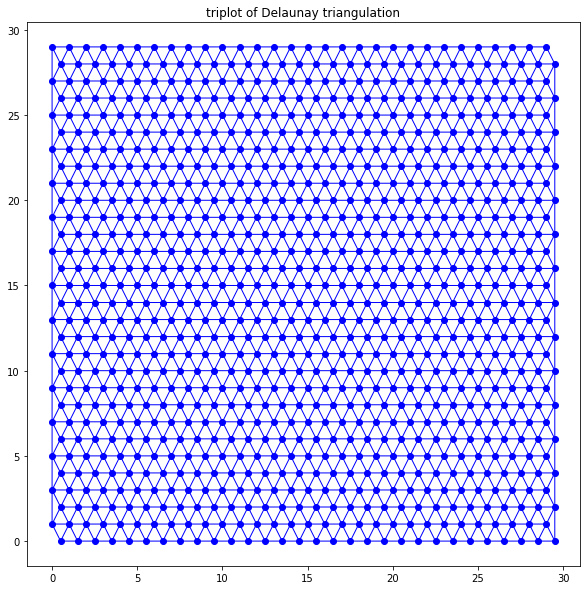

In [2]:
X = np.linspace(0,30,num=30,endpoint=False)
Y = np.linspace(0,30,num=30,endpoint=False)
x , y = np.meshgrid(X,Y)
x[::2,:] += 0.5
x = x.flatten()
y = y.flatten()
triang = mpl.tri.Triangulation(x, y) ## Triangulate parameter space to determine the triangles using a Delaunay triangulation

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.set_aspect('equal')
ax1.triplot(triang, 'bo-', lw=1)
ax1.set_title('triplot of Delaunay triangulation')

In [19]:
U = 10 #10 m/s
sigma_a = 3.16*10**(-3)*U
sigma_c = 0.003 + 1.92*10**(-3)*U
sigma = sigma_a + sigma_c
print(sigma)
sigma = 0.003 + 5.12*10**(-3)*U
print(sigma)
np.random.seed(seed=4)
n_dist = np.random.normal(loc=0,scale = np.sqrt(sigma),size = x.shape[0])
print(np.mean(n_dist))

0.0538
0.054200000000000005
0.015064843116805093


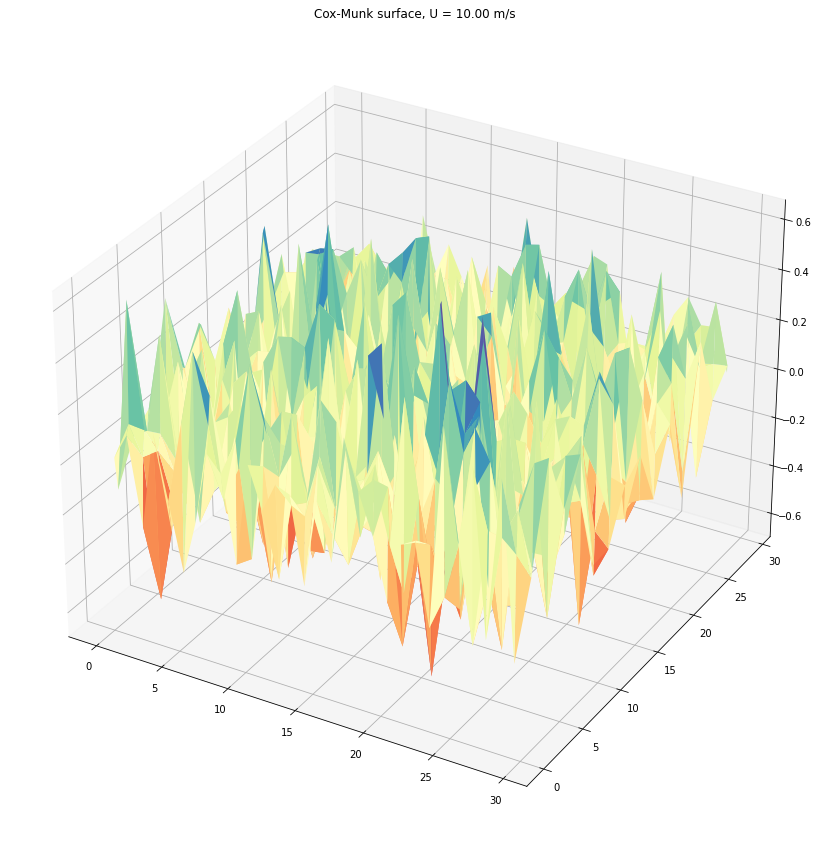

In [20]:
# Plot the surface.  The triangles in parameter space determine which x, y, z points are connected by an edge.
ax = plt.figure(figsize=(15,15)).add_subplot(projection='3d')
# ax = Axes3D(ax)
ax.plot_trisurf(triang,n_dist, linewidth=0.2, antialiased=True,cmap=plt.cm.Spectral) #3d surface
ax.set_title("Cox-Munk surface, U = {:.2f} m/s".format(U))
plt.show()

# Ray Tracing

- In general, each encounter of a ray with a wave facet generates both reflected and a refracted daughter ray
- The directions and radiant powers of these daughter rays are determined by Snell's law and Fresnel's formula (the daughter rays may undergo further encounters with other wave facets)
- In essence, the ray-tracing procedure devolves on repeatedly finding the intersection of a straight line and a triangular plane facet in space

1. intialise wind speed and direction
2. construct a random surface over the hexagonal grid
3. an initial ray incident along the desired direction. The parent ray may approach the surface from the air/water side. The parent ray $\hat{\xi}$ is assigned a radiant power $\Phi ' = 1$, and the point $\overrightarrow{p}'$ where the ray enters the hexagonal domain (e.g. point A). The information ($\hat{\xi}, \Phi ',\overrightarrow{p}'$) is then stored in an array, called the *stack*
4. pull the next triple array $\hat{\xi}, \Phi ',\overrightarrow{p}'$ from the stack then trace the ray to completion
5. Extend the ray from point $\overrightarrow{p}'$ along direction $\hat{\xi}$ until either the ray encounters a surface or leaves the hexagonal grid